In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import read_quote      as rq
import stock_functions as sf
import df_visualizations as dv
import remap_values as rv

import sys
import time

In [27]:
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 10)

colorz = [ 'white', 'red', 'blue', 'green', 'orange', 'cyan', 'olivedrab', 'darkred', 'steeleblue', 'seagreen' ]

In [28]:
inpFile = 'quotes/ibm.csv'
ibm_quote = rq.readQuote( inpFile )

In [123]:
roll_nums = [3,5,10,15,20,25,30]
mom_nums  = [3,5,10,20,30]
rsi_nums  = [10,15,20,25,30]
band_nums = [3,5,10,15,20]

In [124]:
diffs = sf.generate_differentials   ( ibm_quote            )
rolls = sf.generate_rolling_close   ( ibm_quote, roll_nums )
moms  = sf.generate_momentum_close  ( ibm_quote, mom_nums  )
rsi   = sf.generate_rsi             ( ibm_quote, rsi_nums  )
bands = sf.generate_bollinger_bands ( ibm_quote, band_nums )

In [31]:
foo = ibm_quote[['close','open']].copy()
for i in roll_nums:
    foo['close_mean_'+str(i)] = rolls['close_mean_'+str(i)]
foo = foo.drop( 'open', axis=1 )
foo.head()

,close,close_mean_3,close_mean_5,close_mean_10,close_mean_15,close_mean_20,close_mean_25,close_mean_30
date,,,,,,,,
2017/03/10,177.83,178.153333,179.062,179.706,180.142667,180.1710,179.4776,178.781000
2017/03/09,177.18,179.003333,179.506,180.058,180.382667,180.1400,179.3476,178.808667
2017/03/08,179.45,180.100000,180.176,180.505,180.682667,180.0895,179.2320,178.845667
2017/03/07,180.38,180.300000,180.676,180.675,180.728000,180.0400,179.0348,178.727333
2017/03/06,180.47,180.350000,180.564,180.663,180.660000,179.8140,178.8516,178.415667


In [104]:
bar          = foo.copy()
bar['close'] = ( foo.shift(1) / foo - 1 )
for i in [3,5,10]:
    bar['close_mean_'+str(i)] = ( foo['close_mean_'+str(i)].shift(i) / foo['close_mean_'+str(i)] - 1 )    
bar = bar[['close','close_mean_3','close_mean_5','close_mean_10']]
bar = bar.replace([np.inf, -np.inf], np.nan).fillna(0)
bar.head()

,close,close_mean_3,close_mean_5,close_mean_10
date,,,,
2017/03/10,0.000000,0.000000,0.0,0.0
2017/03/09,0.003669,0.000000,0.0,0.0
2017/03/08,-0.012650,0.000000,0.0,0.0
2017/03/07,-0.005156,-0.011906,0.0,0.0
2017/03/06,-0.000499,-0.007467,0.0,0.0


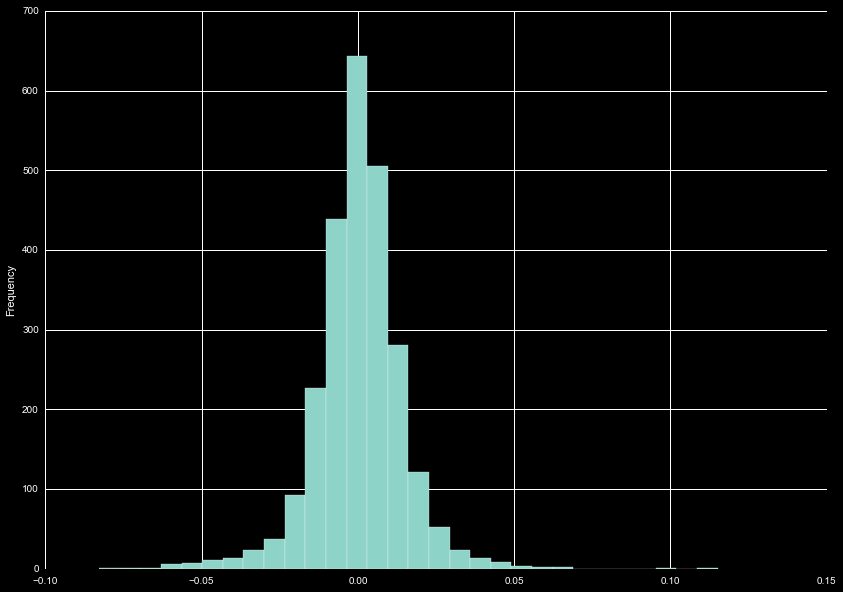

In [105]:
bar['close'].plot.hist( bins=30 )

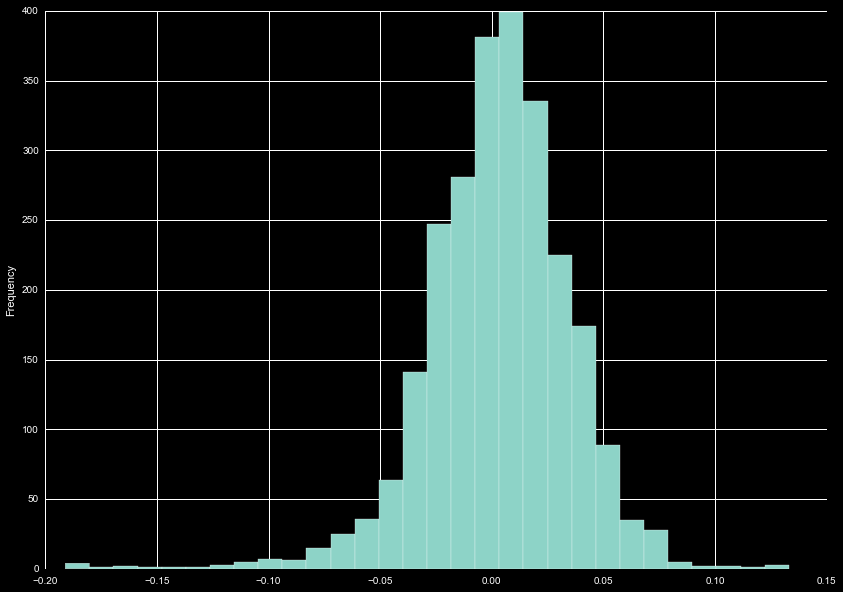

In [76]:
bar['close_mean_10'].plot.hist( bins=30 )

In [106]:
bar['close_mean_10'].describe()

count    2519.000000
mean        0.003094
std         0.032194
min        -0.191086
25%        -0.015071
50%         0.004237
75%         0.022609
max         0.133067
Name: close_mean_10, dtype: float64

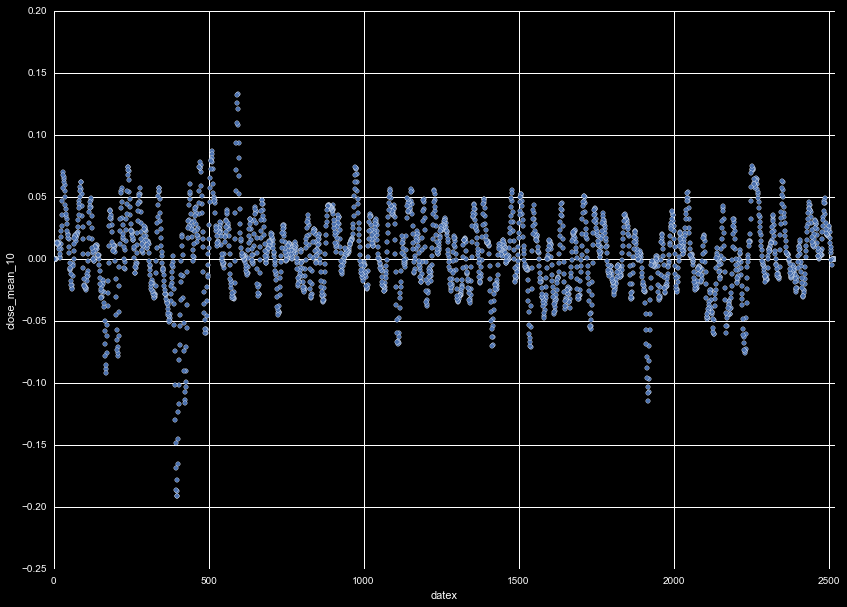

In [107]:
foobar = bar.copy()
foobar['datex'] = np.arange( bar.shape[0], 0, -1 )
foobar.plot.scatter( x='datex', 
                     y='close_mean_10', 
                     xlim=[0,bar.shape[0]] )

In [108]:
foobar = bar.join( diffs, how='inner' )

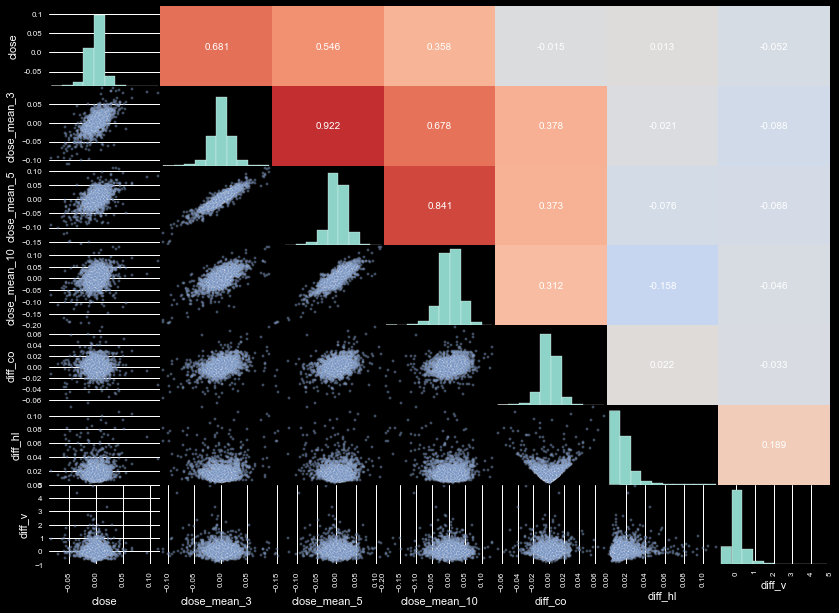

In [109]:
dv.corr_plot( foobar, corr_method = 'pearson')

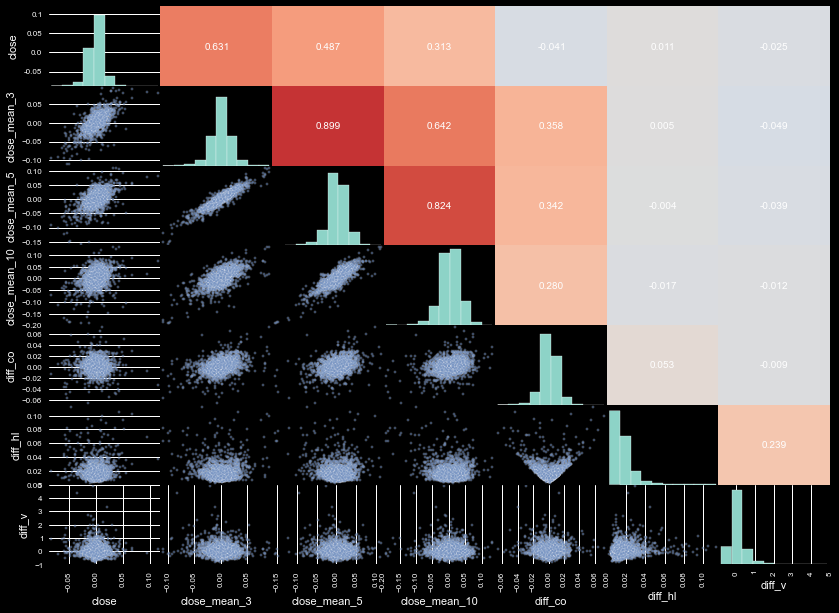

In [110]:
dv.corr_plot( foobar )

In [111]:
print diffs.corrwith( bar['close']         )
print diffs.corrwith( bar['close_mean_3']  )
print diffs.corrwith( bar['close_mean_5']  )
print diffs.corrwith( bar['close_mean_10'] )

diff_co   -0.014523
diff_hl    0.013349
diff_v    -0.051635
dtype: float64
diff_co    0.378467
diff_hl   -0.021462
diff_v    -0.087896
dtype: float64
diff_co    0.372921
diff_hl   -0.075827
diff_v    -0.068355
dtype: float64
diff_co    0.312404
diff_hl   -0.158157
diff_v    -0.046209
dtype: float64


In [91]:
# Diffs appear to be useful

In [113]:
foobar = bar.join( moms, how='inner' )

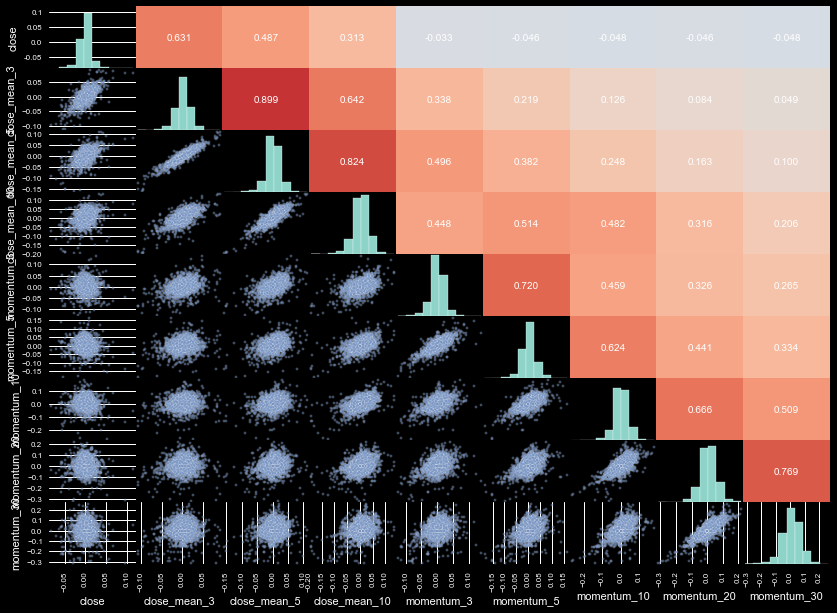

In [114]:
dv.corr_plot( foobar )

In [112]:
print moms.corrwith( bar['close']         )
print moms.corrwith( bar['close_mean_3']  )
print moms.corrwith( bar['close_mean_5']  )
print moms.corrwith( bar['close_mean_10'] )

momentum_3    -0.008687
momentum_5    -0.049300
momentum_10   -0.041745
momentum_20   -0.036111
momentum_30   -0.022975
dtype: float64
momentum_3     0.371842
momentum_5     0.230933
momentum_10    0.141370
momentum_20    0.102089
momentum_30    0.093650
dtype: float64
momentum_3     0.532031
momentum_5     0.400772
momentum_10    0.261860
momentum_20    0.187553
momentum_30    0.164161
dtype: float64
momentum_3     0.489290
momentum_5     0.546055
momentum_10    0.516668
momentum_20    0.358055
momentum_30    0.292336
dtype: float64


In [115]:
# Momentum 3 5 and 10 do decent job

In [116]:
foobar = bar.join( rsi, how='inner' )

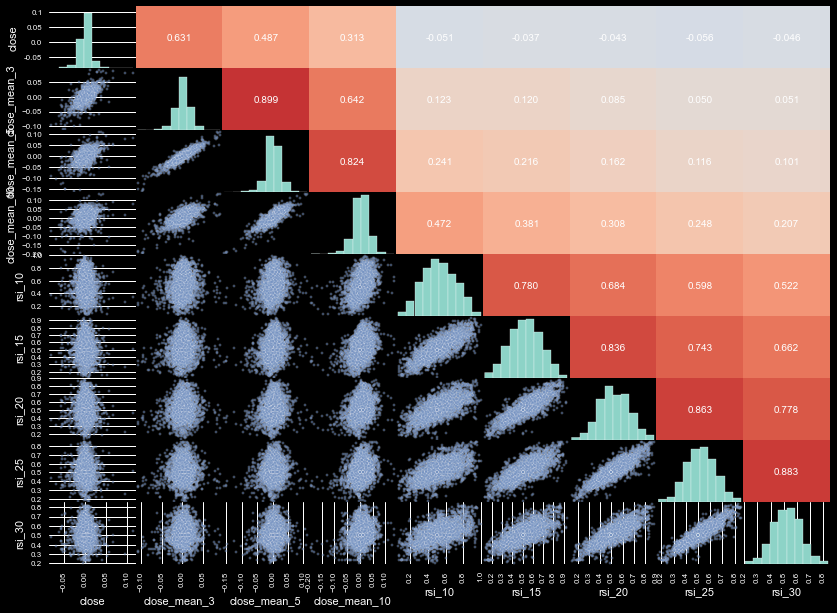

In [117]:
dv.corr_plot( foobar )

In [118]:
print rsi.corrwith( bar['close']         )
print rsi.corrwith( bar['close_mean_3']  )
print rsi.corrwith( bar['close_mean_5']  )
print rsi.corrwith( bar['close_mean_10'] )

rsi_10   -0.042048
rsi_15   -0.024026
rsi_20   -0.026431
rsi_25   -0.038340
rsi_30   -0.031283
dtype: float64
rsi_10    0.122218
rsi_15    0.127611
rsi_20    0.100397
rsi_25    0.069495
rsi_30    0.068457
dtype: float64
rsi_10    0.228574
rsi_15    0.217271
rsi_20    0.175249
rsi_25    0.137948
rsi_30    0.127376
dtype: float64
rsi_10    0.449769
rsi_15    0.375684
rsi_20    0.315178
rsi_25    0.264668
rsi_30    0.238059
dtype: float64


In [119]:
# RSI 10, 15 good

In [125]:
foobar = bar.join( bands, how='inner' )

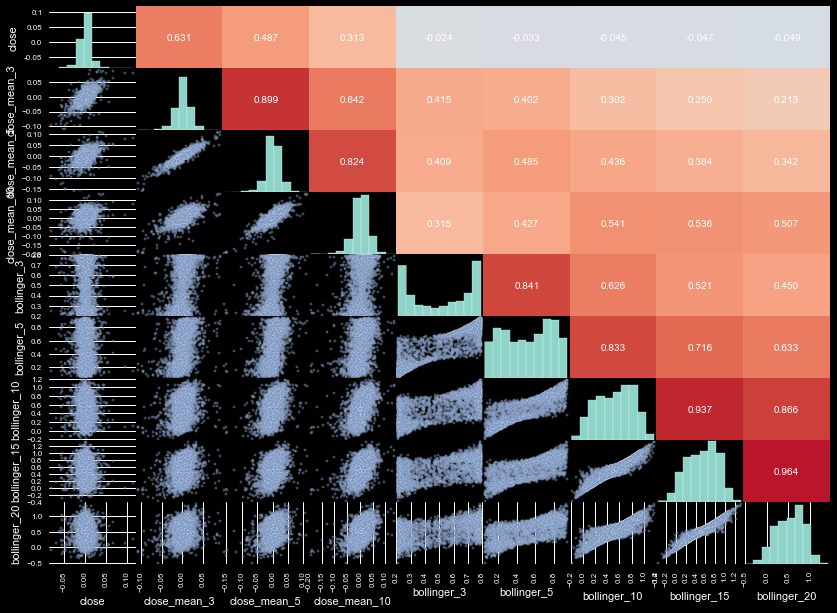

In [126]:
dv.corr_plot( foobar )

In [127]:
print bands.corrwith( bar['close']         )
print bands.corrwith( bar['close_mean_3']  )
print bands.corrwith( bar['close_mean_5']  )
print bands.corrwith( bar['close_mean_10'] )

bollinger_3    -0.016157
bollinger_5    -0.021850
bollinger_10   -0.030471
bollinger_15   -0.028346
bollinger_20   -0.026081
dtype: float64
bollinger_3     0.385588
bollinger_5     0.372848
bollinger_10    0.295191
bollinger_15    0.260574
bollinger_20    0.237126
dtype: float64
bollinger_3     0.392112
bollinger_5     0.456536
bollinger_10    0.417366
bollinger_15    0.383613
bollinger_20    0.357781
dtype: float64
bollinger_3     0.308717
bollinger_5     0.408207
bollinger_10    0.513754
bollinger_15    0.518946
bollinger_20    0.506777
dtype: float64


In [128]:
# bollinger_3, 5, 10, 15 - all good for predictive means around that number of days